<a href="https://colab.research.google.com/github/jamesliudotcc/fast_ai/blob/main/Stochastic_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from fastai.vision.all import *
from fastbook import *

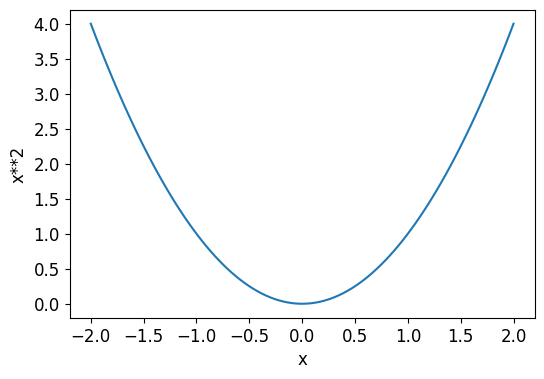

In [ ]:
def f(x): return x ** 2

plot_function(f, 'x', 'x**2')

In [ ]:
xt = tensor(3.).requires_grad_()

In [ ]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
xt.grad

In [ ]:
yt.backward()

In [ ]:
xt.grad

tensor(6.)

Ahah. Running `backward()` on a tensor result from a differentiable function causes the grad to be calculated and registered to the original value that was passed to the function.

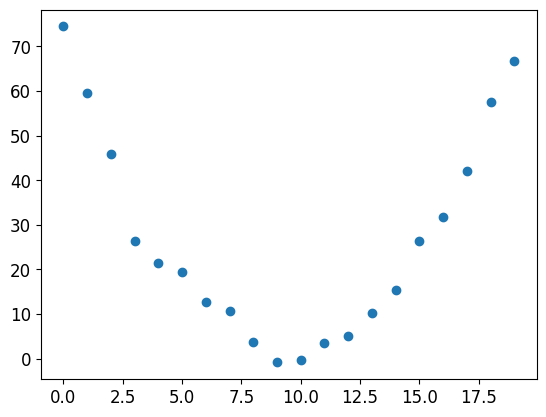

In [ ]:
time = torch.arange(0, 20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time, speed)

In [ ]:
def f(t, params):
    a,b,c = params  # destructure the tensor coming in.
    return a * (t**2) + (b * t) + c  # since `t` is a tensor, this is broadcast

In [ ]:
params = torch.randn(3).requires_grad_()
preds = f(time, params)

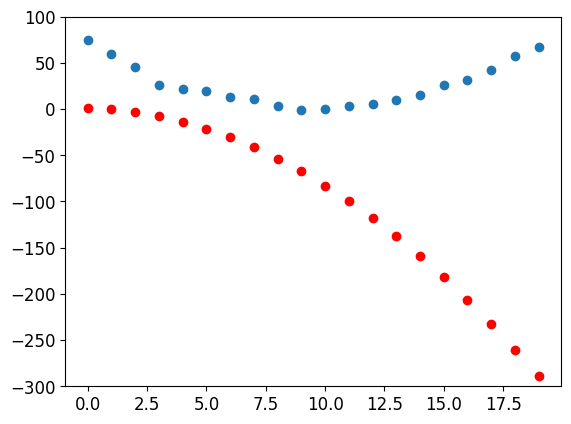

In [ ]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300,100)

show_preds(preds)

In [ ]:
loss = mse(preds, speed)
loss

TensorBase(25823.8086, grad_fn=<AliasBackward0>)

In [ ]:
loss.backward()

RuntimeError: ignored

In [ ]:
params.grad

tensor([-53195.8633,  -3419.7148,   -253.8908])

In [ ]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

AttributeError: ignored

In [ ]:
preds = f(time, params)
mse(preds, speed)

TensorBase(5435.5356, grad_fn=<AliasBackward0>)

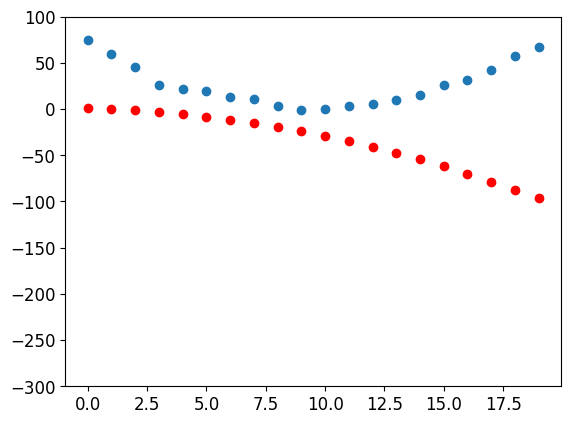

In [ ]:
show_preds(preds)

In [ ]:
def apply_steps(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [ ]:
for i in range(50): apply_steps(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625
676.9480590820312
676.9434814453125
676.9390869140625
676.9346923828125
676.93017578125
676.9259033203125
676.9213256835938
676.9171142578125
676.9126586914062
676.9082641601562
676.90380859375
676.8994750976562
676.8951416015625
676.890625
676.8862915039062
676.8818359375
676.8775024414062
676.8729858398438
676.8687133789062
676.8643798828125
676.85986328125
676.8555297851562
676.8511352539062
676.8466796875
676.84228515625
676.8380126953125
676.8336181640625
676.8291015625
676.8248291015625
676.8203735351562
676.8160400390625
676.8115234375
676.8072509765625
676.8028564453125
676.7984619140625
676.7940673828125
676.7896118164062
676.7852783203125
676.7809448242188
676.7764892578125


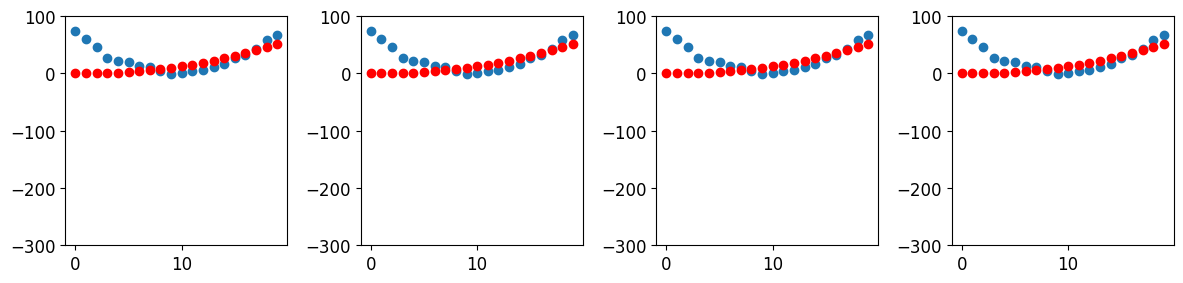

In [ ]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_steps(params, False), ax)
plt.tight_layout()